In [1]:
import pandas as pd
import numpy as np
import pprint
import matplotlib.pyplot as plt

In [2]:
init_data = pd.read_csv("bank.csv")
init_data.head(15)

,age,job,marital,education,default,balance,housing,loan,day,month,duration
0,59,admin.,married,secondary,no,2343,yes,no,5,may,1042
1,56,admin.,married,secondary,no,45,no,no,5,may,1467
2,41,technician,married,secondary,no,1270,yes,no,5,may,1389
3,55,services,married,secondary,no,2476,yes,no,5,may,579
4,54,admin.,married,tertiary,no,184,no,no,5,may,673
5,42,management,single,tertiary,no,0,yes,yes,5,may,562
6,56,management,married,tertiary,no,830,yes,yes,6,may,1201
7,60,retired,divorced,secondary,no,545,yes,no,6,may,1030
8,37,technician,married,secondary,no,1,yes,no,6,may,608
9,28,services,single,secondary,no,5090,yes,no,6,may,1297


In [3]:
init_data['job'].value_counts()

management       2566
blue-collar      1944
technician       1823
admin.           1334
services          923
retired           778
self-employed     405
student           360
unemployed        357
entrepreneur      328
housemaid         274
unknown            70
Name: job, dtype: int64

In [4]:
feature_dropped = ["day","month","duration"]
dataset = init_data.drop(feature_dropped,axis=1)
dataset.loc[((dataset.balance <=0) , 'balance')] =0
dataset.head(10)

,age,job,marital,education,default,balance,housing,loan
0,59,admin.,married,secondary,no,2343,yes,no
1,56,admin.,married,secondary,no,45,no,no
2,41,technician,married,secondary,no,1270,yes,no
3,55,services,married,secondary,no,2476,yes,no
4,54,admin.,married,tertiary,no,184,no,no
5,42,management,single,tertiary,no,0,yes,yes
6,56,management,married,tertiary,no,830,yes,yes
7,60,retired,divorced,secondary,no,545,yes,no
8,37,technician,married,secondary,no,1,yes,no
9,28,services,single,secondary,no,5090,yes,no


In [5]:
dataset.loc[((dataset.balance <=1000) & (dataset.balance>0), 'balance')] =1
dataset.head(10)

,age,job,marital,education,default,balance,housing,loan
0,59,admin.,married,secondary,no,2343,yes,no
1,56,admin.,married,secondary,no,1,no,no
2,41,technician,married,secondary,no,1270,yes,no
3,55,services,married,secondary,no,2476,yes,no
4,54,admin.,married,tertiary,no,1,no,no
5,42,management,single,tertiary,no,0,yes,yes
6,56,management,married,tertiary,no,1,yes,yes
7,60,retired,divorced,secondary,no,1,yes,no
8,37,technician,married,secondary,no,1,yes,no
9,28,services,single,secondary,no,5090,yes,no


In [6]:
dataset.loc[((dataset.balance <=5000) & (dataset.balance>1000), 'balance')] =2
dataset.loc[((dataset.balance <=10000) & (dataset.balance>5000), 'balance')] =3
dataset.loc[((dataset.balance <=20000) & (dataset.balance>10000), 'balance')] =4
dataset.loc[((dataset.balance> 20000), 'balance')] =5
dataset.head(10)

,age,job,marital,education,default,balance,housing,loan
0,59,admin.,married,secondary,no,2,yes,no
1,56,admin.,married,secondary,no,1,no,no
2,41,technician,married,secondary,no,2,yes,no
3,55,services,married,secondary,no,2,yes,no
4,54,admin.,married,tertiary,no,1,no,no
5,42,management,single,tertiary,no,0,yes,yes
6,56,management,married,tertiary,no,1,yes,yes
7,60,retired,divorced,secondary,no,1,yes,no
8,37,technician,married,secondary,no,1,yes,no
9,28,services,single,secondary,no,3,yes,no


In [7]:
dataset.tail(14)

,age,job,marital,education,default,balance,housing,loan
11148,32,blue-collar,married,secondary,no,1,yes,no
11149,46,entrepreneur,married,secondary,no,2,no,no
11150,34,management,married,secondary,no,1,no,no
11151,40,management,married,tertiary,no,1,yes,no
11152,34,housemaid,married,secondary,no,1,yes,no
11153,43,admin.,single,secondary,no,1,no,no
11154,52,technician,married,tertiary,no,1,yes,yes
11155,35,blue-collar,married,secondary,no,1,yes,yes
11156,34,blue-collar,single,secondary,no,0,yes,no
11157,33,blue-collar,single,primary,no,1,yes,no


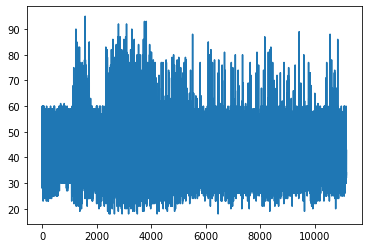

In [8]:
plt.plot(dataset["age"])

In [9]:
dataset[(dataset["age"]<=100) & (dataset["age"]>50)]["loan"].value_counts()

no     2190
yes     281
Name: loan, dtype: int64

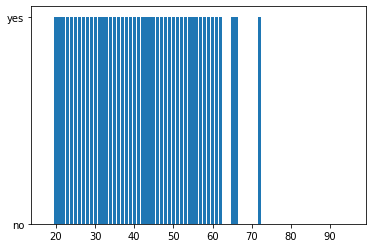

In [10]:
plt.bar(dataset["age"],dataset["loan"])
plt.show()

In [11]:
dataset["loan"].value_counts()

no     9702
yes    1460
Name: loan, dtype: int64

In [12]:
dataset = dataset[dataset["age"]>20]
dataset.head(10)


,age,job,marital,education,default,balance,housing,loan
0,59,admin.,married,secondary,no,2,yes,no
1,56,admin.,married,secondary,no,1,no,no
2,41,technician,married,secondary,no,2,yes,no
3,55,services,married,secondary,no,2,yes,no
4,54,admin.,married,tertiary,no,1,no,no
5,42,management,single,tertiary,no,0,yes,yes
6,56,management,married,tertiary,no,1,yes,yes
7,60,retired,divorced,secondary,no,1,yes,no
8,37,technician,married,secondary,no,1,yes,no
9,28,services,single,secondary,no,3,yes,no


In [13]:
dataset.loc[((dataset.age <=30) & (dataset.age>20), 'age')] =0
dataset.loc[((dataset.age <=45) & (dataset.age>30), 'age')] =1
dataset.loc[((dataset.age <=60) & (dataset.age>45), 'age')] =2
dataset.loc[((dataset.age> 60), 'age')] =3
dataset.head(10)

,age,job,marital,education,default,balance,housing,loan
0,2,admin.,married,secondary,no,2,yes,no
1,2,admin.,married,secondary,no,1,no,no
2,1,technician,married,secondary,no,2,yes,no
3,2,services,married,secondary,no,2,yes,no
4,2,admin.,married,tertiary,no,1,no,no
5,1,management,single,tertiary,no,0,yes,yes
6,2,management,married,tertiary,no,1,yes,yes
7,2,retired,divorced,secondary,no,1,yes,no
8,1,technician,married,secondary,no,1,yes,no
9,0,services,single,secondary,no,3,yes,no


In [14]:

def entropy(target_col):
    elements,counts = np.unique(target_col,return_counts = True)
    entropy = np.sum([(-counts[i]/np.sum(counts))*np.log2(counts[i]/np.sum(counts)) for i in range(len(elements))])
    return entropy

def InfoGain(data,split_attribute_name,target_name="class"):
    total_entropy = entropy(data[target_name])
    
    vals,counts= np.unique(data[split_attribute_name],return_counts=True)
    
    Weighted_Entropy = np.sum([(counts[i]/np.sum(counts))*entropy(data.where(data[split_attribute_name]==vals[i]).dropna()[target_name]) for i in range(len(vals))])
    
    Information_Gain = total_entropy - Weighted_Entropy
    return Information_Gain


def ID3(data,originaldata,features,target_attribute_name="loan",parent_node_class = None):
    if len(np.unique(data[target_attribute_name])) <= 1:
        return np.unique(data[target_attribute_name])[0]

    elif len(data)==0:
        return np.unique(originaldata[target_attribute_name])[np.argmax(np.unique(originaldata[target_attribute_name],return_counts=True)[1])]
    
    elif len(features) ==0:
        return parent_node_class
    
    else:
        parent_node_class = np.unique(data[target_attribute_name])[np.argmax(np.unique(data[target_attribute_name],return_counts=True)[1])]
        
        item_values = [InfoGain(data,feature,target_attribute_name) for feature in features]
        best_feature_index = np.argmax(item_values)
        best_feature = features[best_feature_index]
        
        tree = {best_feature:{}}
        
        features = [i for i in features if i != best_feature]
        for value in np.unique(data[best_feature]):
            value = value
            sub_data = data.where(data[best_feature] == value).dropna()
            subtree = ID3(sub_data,dataset,features,target_attribute_name,parent_node_class)
            tree[best_feature][value] = subtree
            
        return(tree)    
    
def predict(query,tree,default = 1):
    #1.
    for key in list(query.keys()):
        if key in list(tree.keys()):
            #2.
            try:
                result = tree[key][query[key]] 
            except:
                return default
  
            #3.
            result = tree[key][query[key]]
            #4.
            if isinstance(result,dict):
                return predict(query,result)

            else:
                return result

def train_test_split(dataset):
    training_data = dataset.iloc[:8000].reset_index(drop=True)
    testing_data = dataset.iloc[8000:].reset_index(drop=True)
    return training_data,testing_data

training_data = train_test_split(dataset)[0]
testing_data = train_test_split(dataset)[1] 

def test(data,tree):
    queries = data.iloc[:,:-1].to_dict(orient = "records")
    predicted = pd.DataFrame(columns=["predicted"]) 
    for i in range(len(data)):
        predicted.loc[i,"predicted"] = predict(queries[i],tree,1.0) 
    print('The prediction accuracy is: ',(np.sum(predicted["predicted"] == data["loan"])/len(data))*100,'%')
    

In [15]:
tree = ID3(training_data,training_data,training_data.columns[:-1])
print(tree)

{'job': {'admin.': {'balance': {0.0: {'marital': {'divorced': {'default': {'no': {'age': {0.0: {'education': {'secondary': {'housing': {'yes': 'no'}}}}, 1.0: {'housing': {'no': {'education': {'secondary': 'no'}}, 'yes': {'education': {'secondary': 'no'}}}}, 2.0: {'housing': {'no': 'no', 'yes': {'education': {'secondary': 'no'}}}}}}, 'yes': 'yes'}}, 'married': {'default': {'no': {'age': {0.0: 'no', 1.0: {'education': {'primary': {'housing': {'yes': 'no'}}, 'secondary': {'housing': {'no': 'no', 'yes': 'no'}}, 'tertiary': 'no'}}, 2.0: {'education': {'primary': {'housing': {'no': 'yes', 'yes': 'no'}}, 'secondary': {'housing': {'no': 'no', 'yes': 'no'}}, 'tertiary': 'yes', 'unknown': 'no'}}, 3.0: 'no'}}, 'yes': {'housing': {'no': 'yes', 'yes': {'age': {1.0: {'education': {'secondary': 'no'}}}}}}}}, 'single': {'education': {'primary': 'no', 'secondary': {'default': {'no': {'age': {0.0: {'housing': {'no': 'yes', 'yes': 'yes'}}, 1.0: {'housing': {'no': 'yes', 'yes': 'yes'}}, 2.0: {'housing': {

In [16]:
pprint.pprint(tree)

{'job': {'admin.': {'balance': {0.0: {'marital': {'divorced': {'default': {'no': {'age': {0.0: {'education': {'secondary': {'housing': {'yes': 'no'}}}},
                                                                                          1.0: {'housing': {'no': {'education': {'secondary': 'no'}},
                                                                                                            'yes': {'education': {'secondary': 'no'}}}},
                                                                                          2.0: {'housing': {'no': 'no',
                                                                                                            'yes': {'education': {'secondary': 'no'}}}}}},
                                                                           'yes': 'yes'}},
                                                  'married': {'default': {'no': {'age': {0.0: 'no',
                                                                              

                                                                                                                                            'yes': 'no'}}}},
                                                                                                   2.0: {'marital': {'divorced': {'housing': {'no': 'no',
                                                                                                                                              'yes': 'no'}},
                                                                                                                     'married': {'housing': {'no': 'no',
                                                                                                                                             'yes': 'no'}},
                                                                                                                     'single': 'no'}}}},
                                                                             'tertiary

                                                                                                                        2.0: {'default': {'no': 'no'}},
                                                                                                                        3.0: 'no'}},
                                                                                                         'yes': {'age': {0.0: 'no',
                                                                                                                         1.0: {'default': {'no': 'no'}},
                                                                                                                         2.0: 'no'}}}},
                                                                                'unknown': 'no'}},
                                                      'single': 'no'}},
                                    4.0: 'no',
                                    5.0: {'marital': {'married': 'no',
     

                                  2.0: {'education': {'primary': 'no',
                                                      'secondary': {'age': {0.0: {'marital': {'married': 'no',
                                                                                              'single': {'housing': {'no': {'default': {'no': 'no'}},
                                                                                                                     'yes': {'default': {'no': 'no'}}}}}},
                                                                            1.0: {'marital': {'divorced': 'no',
                                                                                              'married': {'housing': {'no': {'default': {'no': 'no'}},
                                                                                                                      'yes': {'default': {'no': 'no'}}}},
                                                                                              's

In [17]:
test(testing_data,tree)


The prediction accuracy is:  80.99967958987504 %
